In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr

In [2]:
fname_u_xz = 'u.xz.nc'
fname_u_xy = 'u.xy.nc'

ds_u_xz = nc.Dataset(fname_u_xz)
ds_u_xy = nc.Dataset(fname_u_xy)

In [37]:
for t in range(95):
    plt.figure(figsize=(10,10))
    plt.imshow(ds_u_xz['u'][t,:,0,:], origin='lower', cmap='RdBu_r')
    plt.savefig('frames/u_xz_{:03d}.png'.format(t))
    plt.close()

for t in range(95):
    plt.figure(figsize=(10,10))
    plt.imshow(ds_u_xy['u'][t,0,:,:], origin='lower', cmap='RdBu_r')
    plt.savefig('frames/u_xy_{:03d}.png'.format(t))
    plt.close()

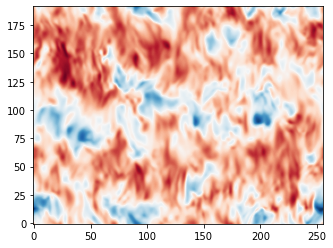

In [36]:
plt.imshow(ds_u_xy['u'][43,2,:,:], origin='lower', cmap='RdBu_r')